# Exploratory Data Analysis for the district level Socio-Economic data of each State in US
../input/dataset18/dataset_18.csv

### The objective of this EDA is to identify the distribution pattern of each socio-economic variable with respect to each state and the corresponding congressional district.
### The general outline of this notebook is as follows:
1. Explore the demographic differences in each district within a state
2. Explore the distribution of socio-economic variables with respect to each congressional district in a given state

### Import necessary libraries.
#### Here I have used matplotlib, geopandas, shapely and ipywidgets for interactive plots

In [141]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import ipywidgets as widgets
import geopandas as gpd
import datetime

In [112]:
from shapely.geometry import Point, Polygon

### Import Dataset into notebook
#### The dataset consists of 10 socio-economic variables and data for each congressional district in a given state in 2018.
1. White %
2. Black %
3. Asian %
4. Hispanic %
5. Female %
6. Age 18 to 55 %
7. Age 55 plus %
8. International immigration count
9. Farming personnel %
10. Personal income

In [113]:
file_path = '/Users/kusalrathnayake/Desktop/TTU/Python/dataset_18.csv'
df = pd.read_csv(file_path)
df = df.drop("Unnamed: 0",axis=1)

### Set figure size and font size

In [114]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size'] = 15

### Objective 1: Explore the demographic differences in each district within a state
#### plot_viz function extracts data for a given state and plot white, black, asian and hispanic percentages for each district of the state in an unstacked bar chart

In [116]:
def plot_viz(State='Virginia'):
    dfstate = df[df.state == State]
    bar_data = dfstate.set_index("district").drop(['year','office','state_po','win_party','male','female','age_18_55','age_55_plus','interM','domesM','farm_E_I','nonfarm_E','personal','win_ratio','win_R'], axis=1)
    bar_data.plot(kind='bar', stacked=False)
    plt.title('White,Black, Asian and Hispanic percentages')
    plt.ylabel('Percentage')
    

In [117]:
# add a drop down button to select the state
widgets.interact(plot_viz,State=df["state"].unique())

interactive(children=(Dropdown(description='State', index=45, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

<function __main__.plot_viz(State='Virginia')>

According to the barplot, we can observe that the non-white percentage is higher in the districts of the states that located in the east coast, west coast and the southern border of the United States. Since the goal of this EDA is to capture the demographic differences in each district, these differences are expeted to be reflected in voting patterns of those particular congressional districts.

#### The same function is modified to plot white, black and asian percentages in a stacked bar chart

In [118]:
def plot_viz(State='Texas'):
    dfstate = df[df.state == State]
    bar_data = dfstate.set_index("district").drop(['year','office','state_po','win_party','hispanic','male','female','age_18_55','age_55_plus','interM','domesM','farm_E_I','nonfarm_E','personal','win_ratio','win_R'], axis=1)
    bar_data.plot(kind='bar', stacked=True)
    plt.title('White,Black and Asian percentages')

In [119]:
# add a drop down button to select the state
widgets.interact(plot_viz,State=df["state"].unique())

interactive(children=(Dropdown(description='State', index=42, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

<function __main__.plot_viz(State='Texas')>

### Objective 2: Explore the distribution of socio-economic variables with respect to each congressional district in a given state
#### In order to create an interactive map for each state that changes with respect to variables, geometry coordinates of each state has to be extracted. 
#### District shapes allocated under 114th congressional disrtict map is used to separate district boundaries of each state. Geopandas library is used to extract the necessary state coordinates

In [122]:
#114th congressional district map
usa_dist = gpd.read_file('/Users/kusalrathnayake/Desktop/TTU/Python/districtShapes/districts114.shp')

<AxesSubplot:>

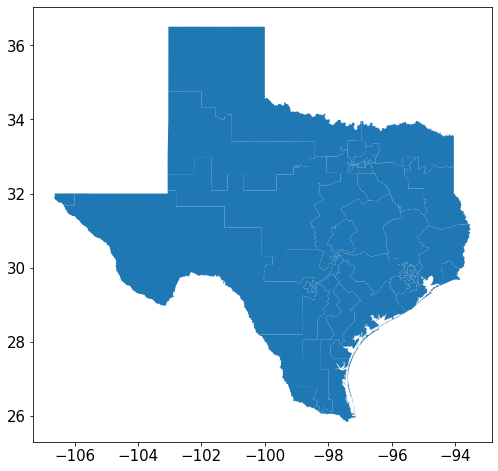

In [124]:
# plot of Texas with congressional district boundaries
usa_dist[usa_dist.STATENAME  == 'Texas'].plot()

In [125]:
#extract texas district boundaries into a dataframe
tx_dist = usa_dist[usa_dist.STATENAME  == 'Texas']
tx_dist = tx_dist.reset_index(drop=True)

In [127]:
datacd = pd.read_csv(file_path)
datacd = datacd.drop("Unnamed: 0",axis=1)

# extract texas dataset from the original dataset with socio-economic variables
datacd_tx = datacd[datacd.state == 'Texas']
datacd_tx = datacd_tx.reset_index(drop=True)

# extract personal income variable as a separate variable from texas dataframe
personal_ic = datacd_tx["personal"]
tx_dist.insert(16,'personal',personal_ic)


<AxesSubplot:>

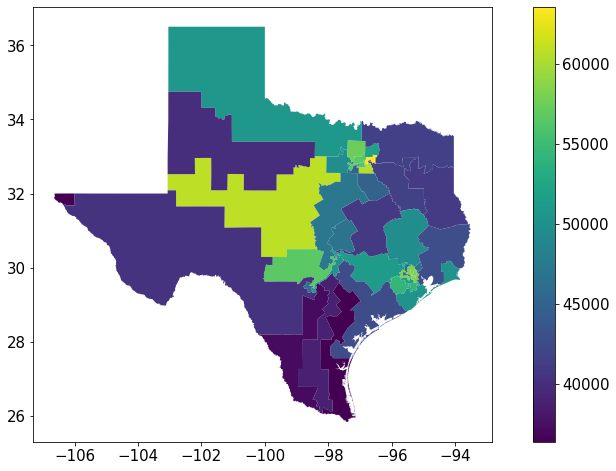

In [129]:
#map of texas congressional district colored according to personal income of each district
tx_dist.plot(column = 'personal',legend = True)

Southern and eastern borders show a very low personal income compared to the personal income levels in central and northern Texas

#### plot_dist114 function extracts the dataset for a given state and plot the map with district boundaries colored according to personal income of each district

In [130]:
def plot_dist114(State='Texas'):
    datacd_state = datacd[datacd.state == State]
    datacd_state = datacd_state.reset_index(drop=True)
    
    state_dist = usa_dist[usa_dist.STATENAME  == State]
    state_dist = state_dist.reset_index(drop=True)
    
    personal_ic = datacd_state["personal"]
    state_dist.insert(16,'personal',personal_ic)
    
    state_dist.plot(column = 'personal',legend = True)

In [131]:
widgets.interact(plot_dist114,State=datacd["state"].unique())

interactive(children=(Dropdown(description='State', index=42, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

<function __main__.plot_dist114(State='Texas')>

<img src="screen.png" alt="Alt text that describes the graphic" title="Title text" />

#### plot_dist114 function is modified to change according to any of the 10 socio-economic variables

In [132]:
def plot_dist114_var(State='Texas', Variable = 'personal'):
    datacd_state = datacd[datacd.state == State]
    datacd_state = datacd_state.reset_index(drop=True)
    
    state_dist = usa_dist[usa_dist.STATENAME  == State]
    state_dist = state_dist.reset_index(drop=True)
    
    var_ic = datacd_state[Variable]
    state_dist.insert(16,'var_indep',var_ic)
    
    state_dist.plot(column = 'var_indep',legend = True)

In [133]:
w = ["white","black","asian","hispanic","female","age_18_55","age_55_plus","interM","farm_E_I","personal"]
widgets.interact(plot_dist114_var,State=datacd["state"].unique(), Variable = w)

interactive(children=(Dropdown(description='State', index=42, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

<function __main__.plot_dist114_var(State='Texas', Variable='personal')>